# Multiple Linear Regression using real world dataset

In [200]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from pandas import DataFrame

from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


plt.rcParams['figure.figsize'] = (10.0, 5.0)


# Importing dataset and finding no. of rows and attributes

In [201]:
dataset = pd.read_excel("car_price_dataset.xlsx")
dataset = DataFrame(dataset, columns=['Price','Mileage','Make','Model','Trim','Type','Cylinder','Liter','Doors','Cruise','Sound','Leather'])
print (dataset.shape)
dataset.head()

(804, 12)


,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


# Statistics of Dataset

In [202]:
dataset.describe()

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
count,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000
mean,21343.143767,19831.934080,5.268657,3.037313,3.527363,0.752488,0.679104,0.723881
std,9884.852801,8196.319707,1.387531,1.105562,0.850169,0.431836,0.467111,0.447355
min,8638.930895,266.000000,4.000000,1.600000,2.000000,0.000000,0.000000,0.000000
25%,14273.073870,14623.500000,4.000000,2.200000,4.000000,1.000000,0.000000,0.000000
50%,18024.995019,20913.500000,6.000000,2.800000,4.000000,1.000000,1.000000,1.000000
75%,26717.316636,25213.000000,6.000000,3.800000,4.000000,1.000000,1.000000,1.000000
max,70755.466717,50387.000000,8.000000,6.000000,4.000000,1.000000,1.000000,1.000000


# Nature of attributes

In [203]:
dataset.dtypes

Price       float64
Mileage       int64
Make         object
Model        object
Trim         object
Type         object
Cylinder      int64
Liter       float64
Doors         int64
Cruise        int64
Sound         int64
Leather       int64
dtype: object

# Dropping null values if any

In [204]:
dataset.dropna(axis=1, how='any', thresh=None, subset=None, inplace=False)
dataset.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


# Check null values through heatmap

In [205]:
#Check null values through heatmap
#dataset.isnull().sum()
#sns.heatmap(dataset.isnull(), yticklabels = False, cbar = False)

# Countplot of  'Make'

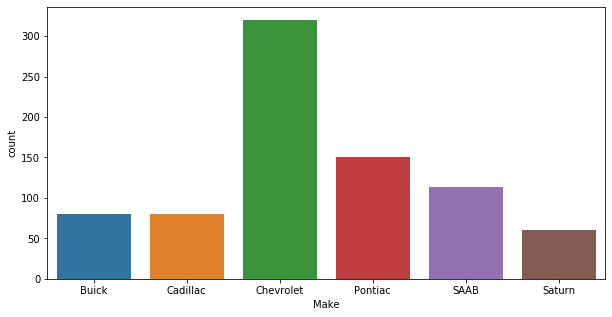

In [206]:
sns.countplot(x = 'Make', data = dataset)

# Countplot of 'Type'

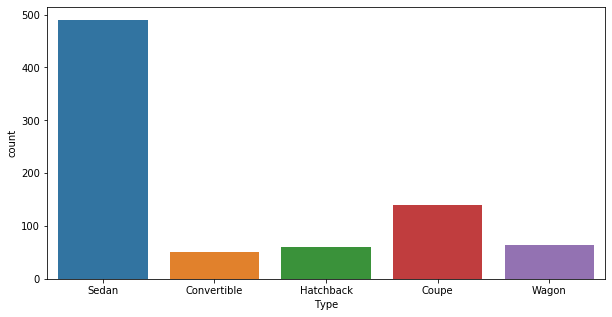

In [207]:
sns.countplot(x = 'Type', data = dataset)

# Counting features of 'Model'

In [208]:
dataset['Model'].value_counts()

Malibu         60
Cavalier       60
AVEO           60
Ion            50
Cobalt         50
9_3 HO         40
9_5            30
Vibe           30
Bonneville     30
Monte Carlo    30
Deville        30
Lacrosse       30
Grand Prix     30
Impala         30
Park Avenue    20
Lesabre        20
9_3            20
Corvette       20
Grand Am       20
G6             20
9_5 HO         20
Sunfire        10
CTS            10
STS-V8         10
L Series       10
XLR-V8         10
Century        10
CST-V          10
GTO            10
Classic        10
STS-V6         10
9-2X AWD        4
Name: Model, dtype: int64

# Frequency Distribution plot of Model

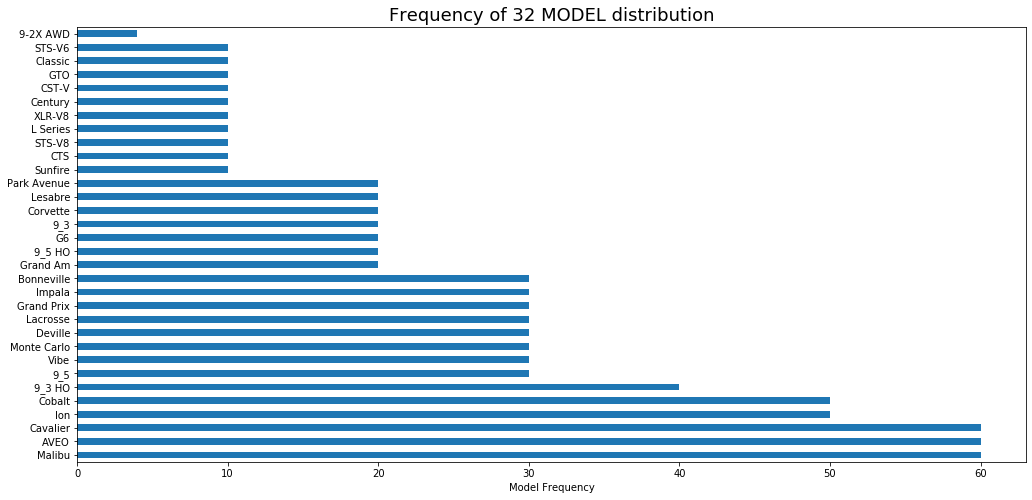

In [209]:
plt.figure(figsize=(17,8))
dataset.Model.value_counts().nlargest(32).plot(kind='barh')
plt.xlabel('Model Frequency')
plt.title("Frequency of 32 MODEL distribution",fontsize=18)
plt.show()

# Distribution Plot of Mileage

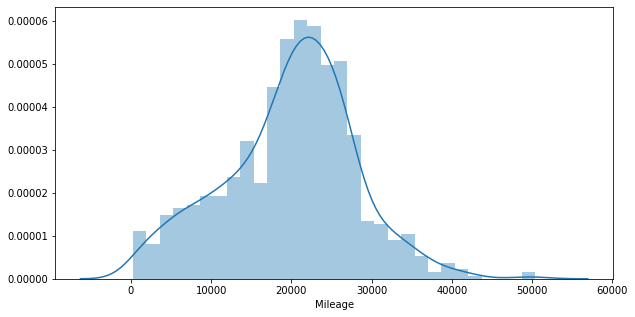

In [210]:
sns.distplot(dataset['Mileage'], bins=30)

# Box plot of Price

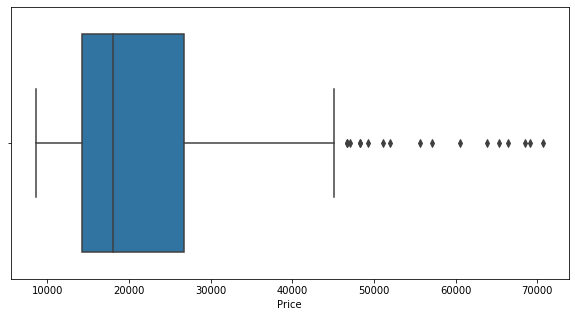

In [211]:
#sns.violinplot(x = 'Type', y = 'Mileage', data = dataset)
sns.boxplot(dataset.Price)

# Bar plot between Price and Type

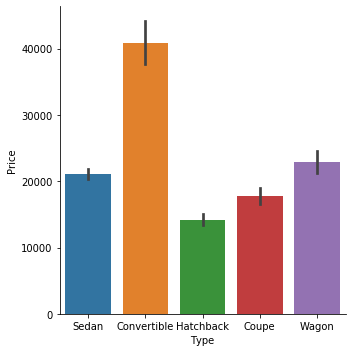

In [212]:
sns.catplot(x="Type", y="Price", kind="bar", data=dataset)

# Strip plot of Price and Make

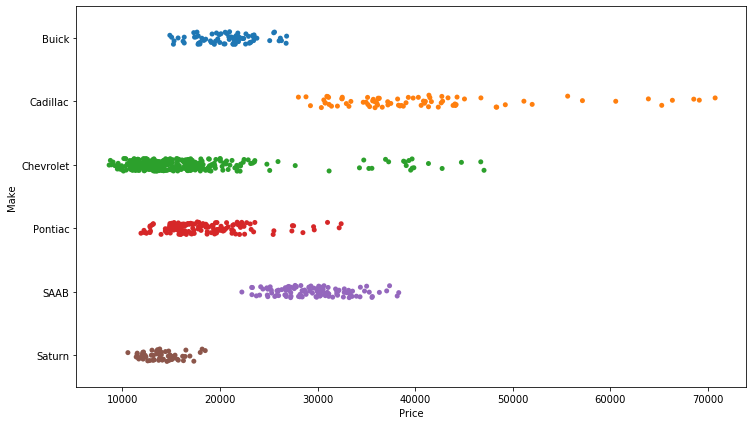

In [213]:
plt.figure(figsize=(12, 7))
sns.stripplot(data = dataset, x='Price', y='Make', jitter=.1)
plt.show()

# Length of features of Trim

In [214]:
print('The length of unique Model of cars is',len(dataset.Trim.unique()))

The length of unique Model of cars is 47


# Scatter plot of Price and Trim

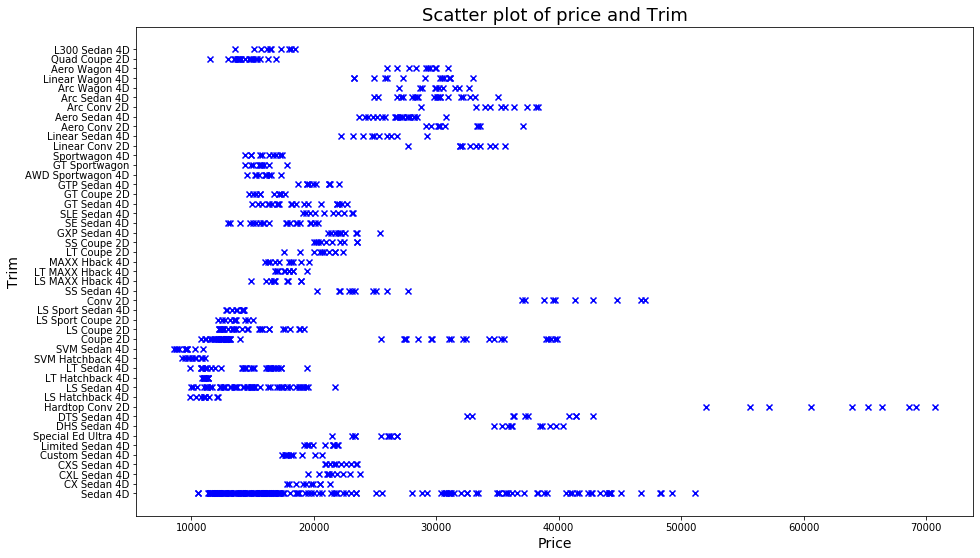

In [215]:
plt.figure(figsize=(15, 9))
# plot two values price per year_model
plt.scatter(dataset.Price, dataset.Trim, c='blue', marker='x')
plt.xlabel("Price", fontsize=14)
plt.ylabel("Trim", fontsize=14)
plt.title("Scatter plot of price and Trim",fontsize=18)
plt.show()

# Length of features of Model

In [216]:
print('The length of unique Model of cars is',len(dataset.Model.unique()))

The length of unique Model of cars is 32


# Scatter plot between Price and Model

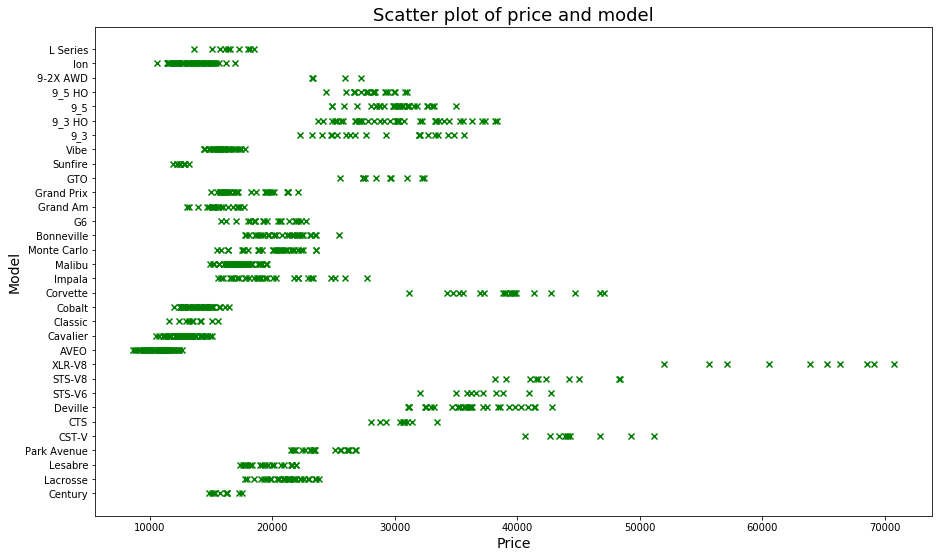

In [217]:
plt.figure(figsize=(15, 9))
# plot two values price per year_model
plt.scatter(dataset.Price, dataset.Model, c='green', marker='x')
plt.xlabel("Price", fontsize=14)
plt.ylabel("Model", fontsize=14)
plt.title("Scatter plot of price and model",fontsize=18)
plt.show()

# To find out the corelation between every DV with the IDV, first we have to encode the cetagorical data. 

# One Hot Encoding

In [218]:
X = dataset[['Make', 'Model', 'Trim', 'Type']]
X = pd.get_dummies(data=X)

concat = pd.concat([dataset, X], axis = 'columns')
concat.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,...,Trim_SVM Hatchback 4D,Trim_SVM Sedan 4D,Trim_Sedan 4D,Trim_Special Ed Ultra 4D,Trim_Sportwagon 4D,Type_Convertible,Type_Coupe,Type_Hatchback,Type_Sedan,Type_Wagon
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,...,0,0,1,0,0,0,0,0,1,0
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,...,0,0,1,0,0,0,0,0,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,...,0,0,1,0,0,0,0,0,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,...,0,0,1,0,0,0,0,0,1,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,...,0,0,1,0,0,0,0,0,1,0


# Finding correlation

In [219]:
corelation = concat.corr()
corelation

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather,Make_Buick,Make_Cadillac,...,Trim_SVM Hatchback 4D,Trim_SVM Sedan 4D,Trim_Sedan 4D,Trim_Special Ed Ultra 4D,Trim_Sportwagon 4D,Type_Convertible,Type_Coupe,Type_Hatchback,Type_Sedan,Type_Wagon
Price,1.000000,-0.143051,0.569086,0.558146,-0.138750,0.430851,-0.124348,0.157197,-0.017768,0.659297,...,-0.126745,-0.134573,0.038838,0.040549,-0.060414,0.508018,-0.168087,-0.206178,-0.034802,0.045134
Mileage,-0.143051,1.000000,-0.029461,-0.018641,-0.016944,0.025037,-0.026146,0.001005,0.024193,-0.037472,...,-0.062219,0.035201,-0.022737,-0.015758,-0.073391,0.027436,0.001510,-0.025691,-0.015905,0.027016
Cylinder,0.569086,-0.029461,1.000000,0.957897,0.002206,0.354285,-0.089704,0.075520,0.175317,0.534896,...,-0.102674,-0.102674,0.141306,0.059189,-0.102674,0.061533,-0.041657,-0.055019,0.180832,-0.269058
Liter,0.558146,-0.018641,0.957897,1.000000,-0.079259,0.377509,-0.065527,0.087332,0.188093,0.406216,...,-0.145992,-0.145992,0.120356,0.077468,-0.125677,0.065886,0.046832,-0.125252,0.140098,-0.255308
Doors,-0.138750,-0.016944,0.002206,-0.079259,1.000000,-0.047674,-0.062530,-0.061969,0.184913,0.087104,...,0.062428,0.062428,0.288053,0.062428,0.062428,-0.462921,-0.825444,0.157973,0.694906,0.163594
Cruise,0.430851,0.025037,0.354285,0.377509,-0.047674,1.000000,-0.091730,-0.070573,0.190645,0.190645,...,-0.039653,-0.091661,0.000544,0.064363,-0.117665,0.147689,-0.040646,-0.264846,0.125714,-0.044285
Sound,-0.124348,-0.026146,-0.089704,-0.065527,-0.062530,-0.091730,1.000000,0.165444,-0.011824,-0.091932,...,-0.019017,-0.091138,-0.015972,-0.019017,-0.067098,-0.043637,0.097838,0.073544,-0.015079,-0.142362
Leather,0.157197,0.001005,0.075520,0.087332,-0.061969,-0.070573,0.165444,1.000000,-0.212930,0.205301,...,-0.031096,-0.106402,0.040472,-0.081300,-0.056198,0.009285,0.063507,0.090697,-0.100940,-0.003375
Make_Buick,-0.017768,0.024193,0.175317,0.188093,0.184913,0.190645,-0.011824,-0.212930,1.000000,-0.110497,...,-0.037305,-0.037305,0.031388,0.337609,-0.037305,-0.085600,-0.152636,-0.094398,0.266099,-0.097757
Make_Cadillac,0.659297,-0.037472,0.534896,0.406216,0.087104,0.190645,-0.091932,0.205301,-0.110497,1.000000,...,-0.037305,-0.037305,0.336665,-0.037305,-0.037305,0.086456,-0.152636,-0.094398,0.180930,-0.097757


In [220]:
corelation['Price'][abs(corelation['Price']) > 0.3]

Price                   1.000000
Cylinder                0.569086
Liter                   0.558146
Cruise                  0.430851
Make_Cadillac           0.659297
Make_Chevrolet         -0.404598
Make_SAAB               0.335404
Model_AVEO             -0.304437
Model_XLR-V8            0.472538
Trim_Hardtop Conv 2D    0.472538
Type_Convertible        0.508018
Name: Price, dtype: float64

# Dropping unwanted data

In [221]:
dataset = concat.drop(columns = ['Make', 'Model', 'Trim', 'Type','Cylinder','Make_Saturn','Model_L Series','Trim_L300 Sedan 4D','Type_Sedan'], axis = 1)
dataset.head()

,Price,Mileage,Liter,Doors,Cruise,Sound,Leather,Make_Buick,Make_Cadillac,Make_Chevrolet,...,Trim_SS Sedan 4D,Trim_SVM Hatchback 4D,Trim_SVM Sedan 4D,Trim_Sedan 4D,Trim_Special Ed Ultra 4D,Trim_Sportwagon 4D,Type_Convertible,Type_Coupe,Type_Hatchback,Type_Wagon
0,17314.103129,8221,3.1,4,1,1,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0
1,17542.036083,9135,3.1,4,1,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
2,16218.847862,13196,3.1,4,1,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
3,16336.913140,16342,3.1,4,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,16339.170324,19832,3.1,4,1,0,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0


# Applying Multiple Linear Regression

In [222]:

X = dataset[['Mileage','Make_Cadillac','Model_XLR-V8','Trim_Hardtop Conv 2D','Type_Convertible','Liter','Doors','Cruise','Sound','Leather']]
Y = dataset[['Price']]

model = LinearRegression()
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .3, random_state = 100)
model.fit(X_train, Y_train)
Ytest_predict = model.predict(X_test)

# Calculating R2 and RMSE

In [223]:
r2 = r2_score(Y_test, Ytest_predict)
print('R2: ', r2)
rmse = np.sqrt(mean_squared_error(Y_test, Ytest_predict))
print('RMSE:',rmse)


R2:  0.8171455608420016
RMSE: 4653.252200727074


# Calculating Mean Absolute Error

In [224]:
print('Mean Absolute Error', mean_absolute_error(Y_test, Ytest_predict))

Mean Absolute Error 3447.4968106646684


# Calculating Model Score to recheck goodness of model

In [225]:
print('Training score', model.score(X_train, Y_train))
print('Test score', model.score(X_test, Y_test))

Training score 0.7738424209381979
Test score 0.8171455608420015


# Predicting Car Price

In [226]:
predict = model.predict([[14095, 1, 0, 0, 0, 4.6, 4, 1, 0, 1]])
print (predict)

[[39771.3295454]]
